In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("12-health_risk_classification.csv")

In [3]:
df.head()

,bmi_score,blood_pressure_variation,activity_level_index,high_risk_flag
0,0.564223,0.652825,1.262925,1
1,-1.692569,2.981229,-0.180331,1
2,0.770383,0.400475,1.365806,1
3,2.135007,0.150832,3.084596,0
4,0.360342,1.026132,1.251574,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   bmi_score                 1000 non-null   float64
 1   blood_pressure_variation  1000 non-null   float64
 2   activity_level_index      1000 non-null   float64
 3   high_risk_flag            1000 non-null   int64  
dtypes: float64(3), int64(1)
memory usage: 31.4 KB


In [5]:
df.describe()

,bmi_score,blood_pressure_variation,activity_level_index,high_risk_flag
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,-0.023702,0.016769,-0.020771,0.498000
std,1.203694,1.268761,1.392738,0.500246
min,-4.743951,-2.587178,-4.999018,0.000000
25%,-0.796655,-0.981320,-1.057938,0.000000
50%,0.142105,-0.317137,0.204506,0.000000
75%,0.956225,1.017388,1.061181,1.000000
max,2.321480,3.954873,3.477210,1.000000


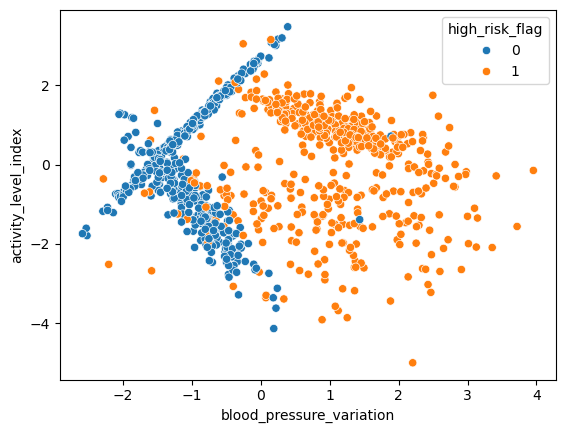

In [6]:
sns.scatterplot(x=df["blood_pressure_variation"],y=df["activity_level_index"],hue=df["high_risk_flag"])
plt.show()

In [7]:
df["high_risk_flag"].value_counts()

high_risk_flag
0    502
1    498
Name: count, dtype: int64

In [8]:
X = df.drop("high_risk_flag", axis = 1)
y = df["high_risk_flag"]

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=15)

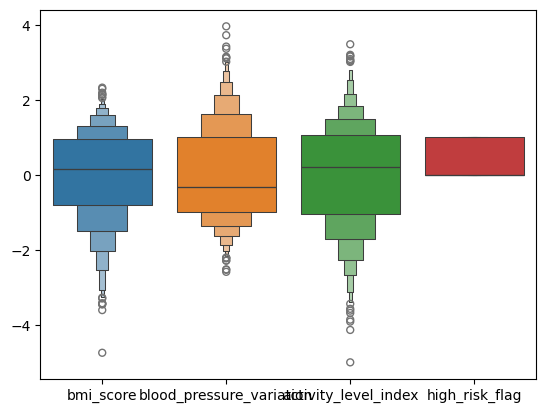

In [11]:
#KNN'de Scaling önemlidir.
sns.boxenplot(df)
plt.show()

In [12]:
#Bu data scale edilmiş bir data ancak biz yine de scaling etmeyi görelim.
from sklearn.preprocessing import StandardScaler
sclaer = StandardScaler()

In [13]:
X_train_scaled = sclaer.fit_transform(X_train)
X_test_sclaed = sclaer.transform(X_test)

In [14]:
from sklearn.neighbors import KNeighborsClassifier

In [15]:
classifier = KNeighborsClassifier(n_neighbors=5,algorithm="auto",weights="uniform")

In [16]:
classifier.fit(X_train_scaled,y_train)

KNeighborsClassifier()

In [17]:
y_pred = classifier.predict(X_test_sclaed)

In [18]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [19]:
print("Confusion Matrix: \n", confusion_matrix(y_test,y_pred))
print("Classification Report: ", classification_report(y_test,y_pred))
print("Accuracy: ", accuracy_score(y_test,y_pred))

Confusion Matrix: 
 [[124   2]
 [ 10 114]]
Classification Report:                precision    recall  f1-score   support

           0       0.93      0.98      0.95       126
           1       0.98      0.92      0.95       124

    accuracy                           0.95       250
   macro avg       0.95      0.95      0.95       250
weighted avg       0.95      0.95      0.95       250

Accuracy:  0.952


In [20]:
#KD Tree ile deneyelim
classifier = KNeighborsClassifier(n_neighbors=5,algorithm="kd_tree",weights="uniform")
classifier.fit(X_train_scaled,y_train)

KNeighborsClassifier(algorithm='kd_tree')

In [22]:
y_pred1 = classifier.predict(X_test_sclaed)
print("Confusion Matrix: \n", confusion_matrix(y_test,y_pred1))
print(classification_report(y_test,y_pred1))
print("Accuracy: ", accuracy_score(y_test,y_pred1))

Confusion Matrix: 
 [[124   2]
 [ 10 114]]
              precision    recall  f1-score   support

           0       0.93      0.98      0.95       126
           1       0.98      0.92      0.95       124

    accuracy                           0.95       250
   macro avg       0.95      0.95      0.95       250
weighted avg       0.95      0.95      0.95       250

Accuracy:  0.952


In [26]:
#k number ile oynayarak performansı ölçebiliriz
classifier = KNeighborsClassifier(n_neighbors=3,algorithm="kd_tree",weights="uniform")
classifier.fit(X_train_scaled,y_train)

KNeighborsClassifier(algorithm='kd_tree', n_neighbors=3)

In [27]:
y_pred2 = classifier.predict(X_test_sclaed)
print("Confusion Matrix: \n", confusion_matrix(y_test,y_pred2))
print(classification_report(y_test,y_pred2))
print("Accuracy: ", accuracy_score(y_test,y_pred2))

Confusion Matrix: 
 [[125   1]
 [  9 115]]
              precision    recall  f1-score   support

           0       0.93      0.99      0.96       126
           1       0.99      0.93      0.96       124

    accuracy                           0.96       250
   macro avg       0.96      0.96      0.96       250
weighted avg       0.96      0.96      0.96       250

Accuracy:  0.96


## KNN Regressor Example:

In [28]:
df_reg = pd.read_csv("12-house_energy_regression.csv")

In [29]:
df_reg.head()

,avg_indoor_temp_change,outdoor_humidity_level,daily_energy_consumption_kwh
0,-0.167118,0.146714,-14.996950
1,-0.020902,0.117327,-12.678089
2,0.150419,0.364961,17.775455
3,0.555604,0.089581,6.661465
4,0.058209,-1.142970,-14.195530


In [30]:
df_reg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   avg_indoor_temp_change        1000 non-null   float64
 1   outdoor_humidity_level        1000 non-null   float64
 2   daily_energy_consumption_kwh  1000 non-null   float64
dtypes: float64(3)
memory usage: 23.6 KB


In [31]:
df_reg.describe()

,avg_indoor_temp_change,outdoor_humidity_level,daily_energy_consumption_kwh
count,1000.000000,1000.000000,1000.000000
mean,0.033186,0.056982,1.766025
std,0.961603,1.014959,41.299085
min,-3.241267,-2.940389,-132.797922
25%,-0.611581,-0.651418,-25.600072
50%,0.036043,0.047742,1.065474
75%,0.648317,0.714886,28.766573
max,3.078881,3.852731,138.577662


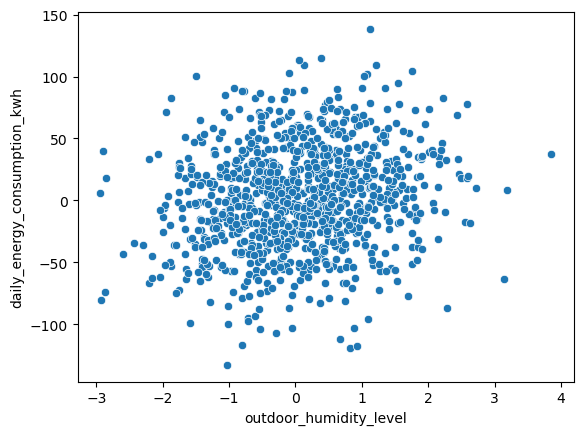

In [36]:
sns.scatterplot(x=df_reg["outdoor_humidity_level"], y=df_reg["daily_energy_consumption_kwh"])
plt.show() #ikisi arasında çok büyük bir korelasyon yok.

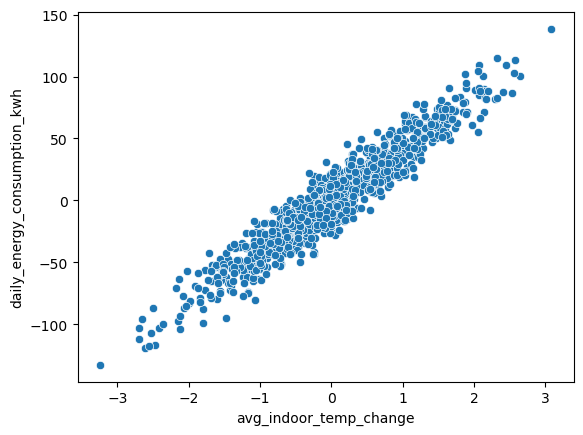

In [38]:
sns.scatterplot(x=df_reg["avg_indoor_temp_change"], y=df_reg["daily_energy_consumption_kwh"])
plt.show() #ikisi arasında bariz bir korelasyon var, evin sıcaklık değişimi elektrik harcamayı etkiliyor yani

In [39]:
df_reg.corr()

,avg_indoor_temp_change,outdoor_humidity_level,daily_energy_consumption_kwh
avg_indoor_temp_change,1.000000,0.002584,0.956682
outdoor_humidity_level,0.002584,1.000000,0.169557
daily_energy_consumption_kwh,0.956682,0.169557,1.000000


In [40]:
X = df_reg.drop("daily_energy_consumption_kwh", axis=1)
y = df_reg["daily_energy_consumption_kwh"]

In [43]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3, random_state = 15)

In [44]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [45]:
from sklearn.neighbors import KNeighborsRegressor

In [47]:
regressor = KNeighborsRegressor(n_neighbors=5, algorithm="auto")

In [48]:
regressor.fit(X_train_scaled, y_train)

KNeighborsRegressor()

In [49]:
y_pred4 = regressor.predict(X_test_scaled)

In [50]:
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error

In [51]:
print("R2 Score: ", r2_score(y_test,y_pred4))
print("MAE ", mean_absolute_error(y_test,y_pred4))
print("MSE: ", mean_squared_error(y_test,y_pred4))

R2 Score:  0.9152685146562609
MAE  9.42143518926242
MSE:  140.40201685069158


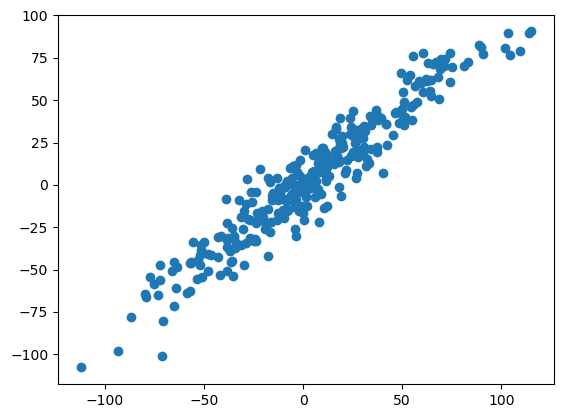

In [52]:
plt.scatter(y_test, y_pred4)
plt.show()

In [54]:
#neighbor'ı 7 deneyelim:
regressor = KNeighborsRegressor(n_neighbors=7, algorithm="auto")
regressor.fit(X_train_scaled, y_train)

KNeighborsRegressor(n_neighbors=7)

In [55]:
y_pred5 = regressor.predict(X_test_scaled)

In [56]:
print("R2 Score: ", r2_score(y_test,y_pred5))
print("MAE ", mean_absolute_error(y_test,y_pred5))
print("MSE: ", mean_squared_error(y_test,y_pred5))

R2 Score:  0.9164863388635838
MAE  9.331428506491209
MSE:  138.38405417502187


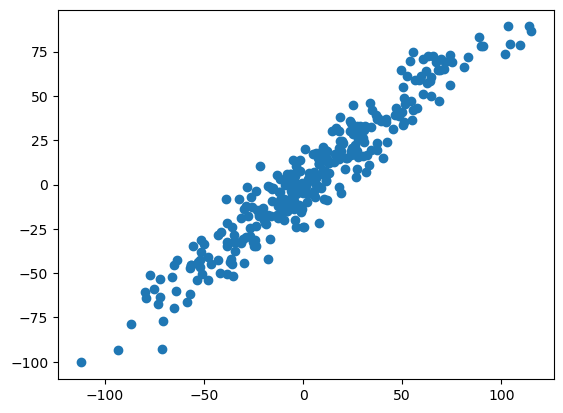

In [57]:
plt.scatter(y_test, y_pred5)
plt.show()

In [58]:
#neighbor'u abartıp 35 yapalım
regressor = KNeighborsRegressor(n_neighbors=35, algorithm="auto")
regressor.fit(X_train_scaled, y_train)
y_pred6 = regressor.predict(X_test_scaled)
print("R2 Score: ", r2_score(y_test,y_pred6))
print("MAE ", mean_absolute_error(y_test,y_pred6))
print("MSE: ", mean_squared_error(y_test,y_pred6))

R2 Score:  0.9054596209710335
MAE  9.62138061650753
MSE:  156.65557892260577
